<br></br>
# **Project One**
Stop Words

## **지속성장 보고서 불용어 추출**
보고서간의 특징구별 단어들 추출

In [1]:
from konlpy.tag import Twitter
twitter = Twitter()
twitter.pos("삼성전자 글로벌센터 전자사업부", stem=True)

[('삼성', 'Noun'),
 ('전자', 'Noun'),
 ('글로벌', 'Noun'),
 ('센터', 'Noun'),
 ('전자', 'Noun'),
 ('사업', 'Noun'),
 ('부', 'Noun')]

<br></br>
## **1 text 문서에서 token 추출하기**
Document 에서 한글 추출하기

In [2]:
# Step 1 - pdf 에서 변환한 Document 불러오기
filename = '../data/kr-Report_2018.txt'
with open(filename, 'r', encoding='utf-8') as f:
    texts = f.read()
texts[:300]

'삼성전자\n지속가능경영보고서\n2018\nINSPIRE\nTHE WORLD\nCREATE\nTHE FUTURE\nINSPIRE THE WORLD\nABOUT THIS REPORT\n보고서 개요\n삼성전자는 경제·사회·환경적 가치창출의 통합적인 성과를 다양한 이해관계자에게\n투명하게 소통하고자 매년 지속가능경영보고서를 발간하고 있으며,\n2018년 열한 번째 지속가능경영보고서를 발간합니다.\n보고기간\n본 보고서는 2017년 1월 1일부터 2017년 12월 31일까지의 경제·사회·환경적 성과와 활동을\n담고 있으며, 일부 정성 성과에 대해서는 2018년 5월까'

In [3]:
# Step 2 - 한글만 추출
import re
texts     = texts.replace('\n', ' ')   # 해당줄의 줄바꿈 내용 제거
tokenizer = re.compile(r'[^ ㄱ-힣]+')   # 한글과 띄어쓰기를 제외한 모든 글자를 선택
texts     = tokenizer.sub('', texts)   # 한글과 띄어쓰기를 제외한 모든 부분을 제거
texts[:300]

'삼성전자 지속가능경영보고서              보고서 개요 삼성전자는 경제사회환경적 가치창출의 통합적인 성과를 다양한 이해관계자에게 투명하게 소통하고자 매년 지속가능경영보고서를 발간하고 있으며 년 열한 번째 지속가능경영보고서를 발간합니다 보고기간 본 보고서는 년 월 일부터 년 월 일까지의 경제사회환경적 성과와 활동을 담고 있으며 일부 정성 성과에 대해서는 년 월까지의 자료를 포함하고 있습니다 정량성과는 연도별 추이 분석이 가능하도록 최근 개년 수치를 제공하고 있습니다 보고범위 보고범위는 국내와 해외 전 사업장과 공급망을 포함합니'

In [4]:
# Step 3 - Token으로 변환한다
from nltk.tokenize import word_tokenize
tokens    = word_tokenize(texts)
tokens[:7]

['삼성전자', '지속가능경영보고서', '보고서', '개요', '삼성전자는', '경제사회환경적', '가치창출의']

In [5]:
# Step 4 - 복합명사는 묶어서 Filtering 출력
# ex) 삼성전자의 스마트폰은 -- > 삼성전자 스마트폰

noun_token = []
for token in tokens:
    token_pos = twitter.pos(token)
    temp      = [txt_tag[0]   for txt_tag in token_pos   
                              if txt_tag[1] == 'Noun']
    if len("".join(temp)) > 1:
        noun_token.append("".join(temp))

texts = " ".join(noun_token)
texts[:300]

'삼성전자 지속가능경영보고서 보고서 개요 삼성전자 경제사회환경 가치창 통합 성과 이해관계자 소통자 매년 지속가능경영보고서 발간 열한 지속가능경영보고서 발간 보고기간 보고서 경제사회환경 성과 활동 일부 정성 성과 자료 정량 연도별 추이 분석 최근 개년 수치 보고범위 보고범위 국내 해외 사업 공급망 재무성 연결기준 사업 환경 정량 국내외 생산 법인 데이터 기준 작성기준 핵심 부합 방법 추가정보 삼성전자 대표 홈페이지 지속가능경영 홈페이지 홈페이지 삼성전자 뉴스룸 작성자 삼성전자 지속가능경영사무국 주소 경기도 수원시 영통구 삼성로 이메일 '

<br></br>
## **2 StopWord 데이터 필터링**
**stopwords.txt** : 2015, 2016, 2017, 2018년 모두 존재하는 단어목록

In [6]:
# stopwords.txt : 2015, 2016, 2017, 2018 모두 출현했던 단어들 불러오기
with open('../data/stopwords.txt', 'r', encoding='utf-8') as f:
    stopwords = f.read()

stopwords = stopwords.split(' ')
stopwords[:10]

['대규모', '반응', '시대', '최고', '프로그래밍', '납기', '보상', '안전규정', '신뢰성과', '온라인']

In [7]:
# 필터링 텍스트를 살펴보기
from nltk.tokenize import word_tokenize
texts = word_tokenize(texts)
texts[:8]

['삼성전자', '지속가능경영보고서', '보고서', '개요', '삼성전자', '경제사회환경', '가치창', '통합']

In [8]:
# Stopwords 를 활용하여 Token을 필터링
texts = [text for text in texts  
              if text not in stopwords]

# pandas 를 활용하여 상위빈도 객체를 출력한다
import pandas as pd
from nltk import FreqDist
freqtxt = pd.Series(dict(FreqDist(texts))).sort_values(ascending=False)
freqtxt[:25]

가치창       39
재생에너지     39
지배구조      39
정량성과표     37
각주        37
전세계       27
조원        20
업사이클링     18
순환경제      17
릴루미노      16
쿡스토브      16
체험관       14
환경보호국     14
뉴욕        13
중요이슈      13
천톤        12
옴부즈위원회    12
몰렌긱       12
공장        11
소방관       11
출연        11
연장        10
러시        10
시력        10
생활임금       9
dtype: int64

<br></br>
## **3 Konlpy 의 단점들**
오타/ 비정형 텍스트의 처리

In [9]:
from konlpy.tag import Twitter
twitter = Twitter()
twitter.pos('가치창출')

[('가치', 'Noun'), ('창', 'Noun'), ('출', 'Verb')]

In [10]:
twitter.pos('갤러시')

[('갤', 'Verb'), ('러시', 'Noun')]

<br></br>
## **4 WordCloud 출력**
visualization

In [11]:
# wordcloud 출력
from wordcloud import WordCloud
wcloud = WordCloud('../data/D2Coding.ttf',
                   relative_scaling = 0.2,
                   background_color = 'white').generate(" ".join(texts))
wcloud

(-0.5, 399.5, 199.5, -0.5)

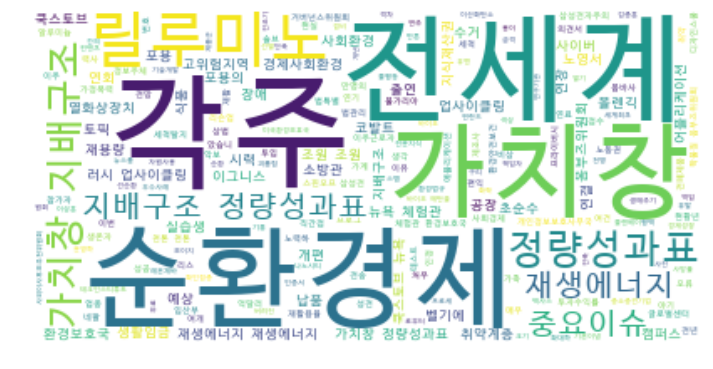

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")